## Import library

In [96]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os 
import pathlib
import cv2
import matplotlib.image as mpig
from keras_preprocessing.image import ImageDataGenerator

## Data Collecting

### Membuat path data train, test & validation

In [97]:
BASE_PATH = 'Multi-class Weather Dataset/'
train_dir = 'Multi-class Weather Dataset/train'
test_dir = 'Multi-class Weather Dataset/test'
val_dir = 'Multi-class Weather Dataset/val'

## Augmentasi (Data Preprocessing)

### Membuat datagen untuk mendeklarasikan ImageDataGenerator

In [98]:
img_datagen = ImageDataGenerator(
    rescale = 1./255, 
    rotation_range = 0.45,
    width_shift_range = 0.2, 
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
)

In [99]:
train_generator = img_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 8,
    shuffle = True,
    class_mode = 'categorical',
)

validation_generator = img_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 8, 
    shuffle = True,
    class_mode = 'categorical',
)
test_generator = img_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 8,
    shuffle = True,
    class_mode = 'categorical',
)

Found 825 images belonging to 4 classes.
Found 227 images belonging to 4 classes.
Found 111 images belonging to 4 classes.


In [100]:
## Simpan file hasil augmentasi

In [101]:
img_gen = img_datagen.flow_from_directory(
    BASE_PATH, #path gambarnya
    target_size = (150,150),
    batch_size = 8,
    shuffle = True,
    class_mode = 'categorical',
    save_to_dir = 'augm',
    save_prefix = 'aug',
    save_format = 'jpg'
)

Found 1163 images belonging to 3 classes.


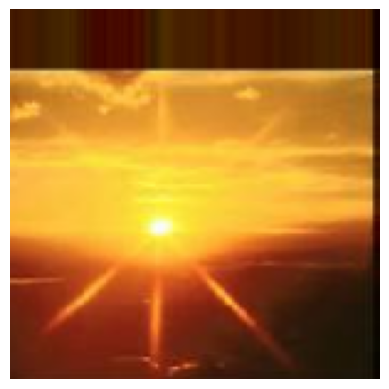

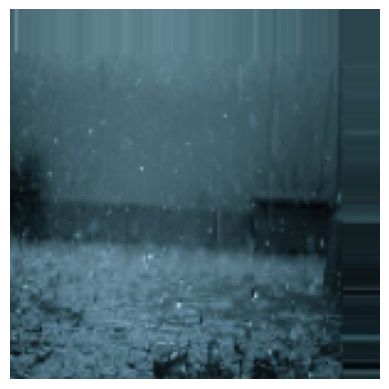

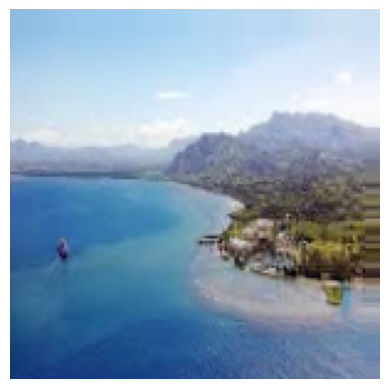

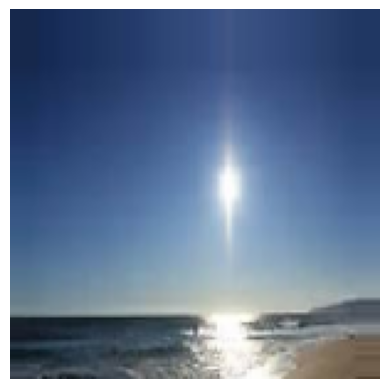

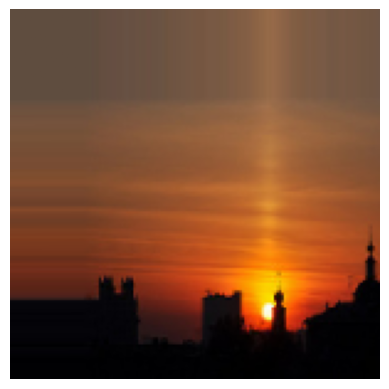

In [102]:
for i in range(5):
    img, label = img_gen.next()
    plt.imshow(img[0])
    plt.axis('off')
    plt.show()

## Visualisasi Data

### Meta Data

In [103]:
image, label = next(iter(train_generator))

def getsize():
    image_count = 0
    for i in os.listdir(BASE_PATH):
        data_dir = pathlib.Path("Multi-class Weather Dataset/" + i)
        image_count += len(list(data_dir.glob('*/*.jpg')))
    return image_count

def getTrainsize():
    image_count = 0
    
    data_dir = pathlib.Path(train_dir)
    image_count += len(list(data_dir.glob('*/*.jpg')))
    return image_count

def getValsize():
    image_count = 0
    
    data_dir = pathlib.Path(val_dir)
    image_count += len(list(data_dir.glob('*/*.jpg')))
    return image_count

def getTestsize():
    image_count = 0
    
    data_dir = pathlib.Path(test_dir)
    image_count += len(list(data_dir.glob('*/*.jpg')))
    return image_count


In [104]:
print("Datasets      :  Multi-class Weather Dataset")
print("Image Feature : ", image.shape)
print("Label Feature : ", train_generator)
print("Image Count   : ", getsize())
print("Train Size    : ", getTrainsize())
print("Val Size      : ", getValsize())
print("Test Size     : ", getTestsize())

Datasets      :  Multi-class Weather Dataset
Image Feature :  (8, 150, 150, 3)
Label Feature :  <keras_preprocessing.image.directory_iterator.DirectoryIterator object at 0x000001BEA748BA30>
Image Count   :  1160
Train Size    :  822
Val Size      :  227
Test Size     :  111


### Preview Image

In [105]:
image, label = train_generator.next()

In [106]:
label_name = ['Cloudy', 'Rain', 'Shine', 'Sunrise']

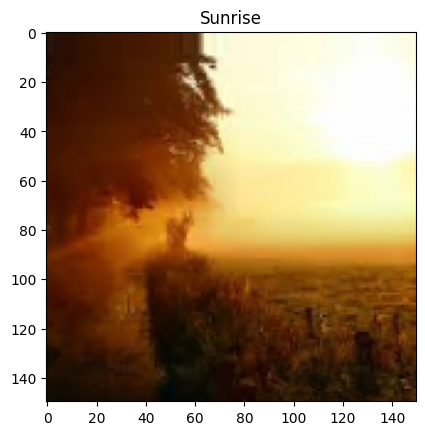

In [107]:
inp = 1
index = inp
plt.title(label_name[tf.argmax(label[index])])
plt.imshow(image[inp])

## Data Modeling

In [108]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=[150,150,3]),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
])

In [109]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 16)      

In [110]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [111]:
hasil = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
104/104 [==============================] - 20s 183ms/step - loss: 1.0646 - accuracy: 0.5455 - val_loss: 0.7373 - val_accuracy: 0.7489
Epoch 2/10
104/104 [==============================] - 17s 162ms/step - loss: 0.7075 - accuracy: 0.6970 - val_loss: 1.1034 - val_accuracy: 0.6696
Epoch 3/10
104/104 [==============================] - 15s 143ms/step - loss: 0.6424 - accuracy: 0.7539 - val_loss: 2.0360 - val_accuracy: 0.5286
Epoch 4/10
104/104 [==============================] - 15s 145ms/step - loss: 0.6220 - accuracy: 0.7600 - val_loss: 0.4715 - val_accuracy: 0.8458
Epoch 5/10
104/104 [==============================] - 15s 145ms/step - loss: 0.6072 - accuracy: 0.7588 - val_loss: 0.3673 - val_accuracy: 0.8590
Epoch 6/10
104/104 [==============================] - 15s 140ms/step - loss: 0.5226 - accuracy: 0.7867 - val_loss: 0.3517 - val_accuracy: 0.8987
Epoch 7/10
104/104 [==============================] - 15s 139ms/step - loss: 0.4830 - accuracy: 0.8085 - val_loss: 0.3108 - val_ac

## Plotting model

C:\Users\Hp Gk\AppData\Local\Temp\ipykernel_15844\1018555481.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', color='r', label='Akurasi Training')
C:\Users\Hp Gk\AppData\Local\Temp\ipykernel_15844\1018555481.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_accuracy, 'b', color='b', label='Akurasi Validation')
C:\Users\Hp Gk\AppData\Local\Temp\ipykernel_15844\1018555481.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b',color='r', label='Loss Training')
C:\Users\Hp Gk\AppData\Local\Temp\ipykernel_15844\1018555481.py:17: UserWarnin

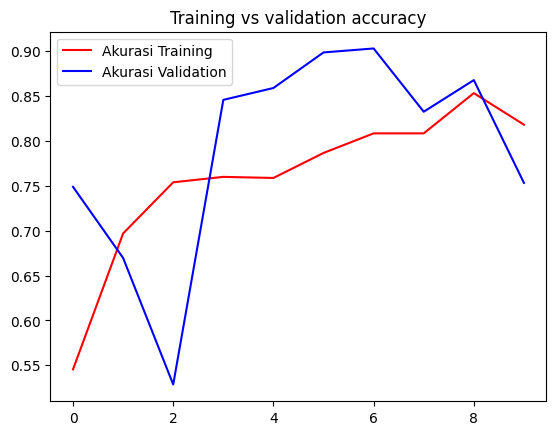

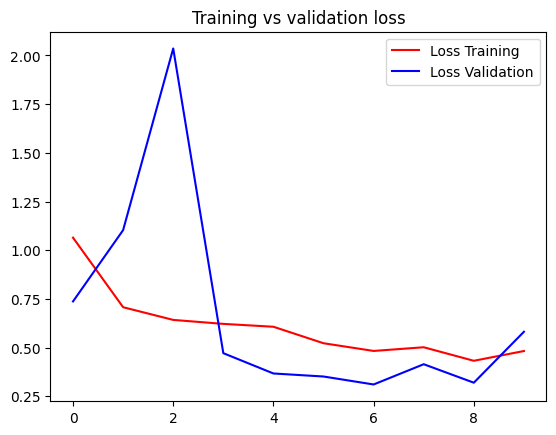

In [112]:
import matplotlib.pyplot as plt
acc = hasil.history['accuracy']
val_accuracy = hasil.history['val_accuracy']
loss = hasil.history['loss']
val_loss = hasil.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', color='r', label='Akurasi Training')
plt.plot(epochs, val_accuracy, 'b', color='b', label='Akurasi Validation')
plt.title('Training vs validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b',color='r', label='Loss Training')
plt.plot(epochs, val_loss, 'b',color='b', label='Loss Validation')
plt.title('Training vs validation loss')
plt.legend()

plt.show()

## Evaluate model

In [113]:
model.evaluate(test_generator)

14/14 [==============================] - 2s 156ms/step - loss: 1.0281 - accuracy: 0.6036


[1.0281429290771484, 0.6036036014556885]